In [1]:
import scipy.optimize as opt
import numpy as np
import matplotlib.pyplot as plt

# Formulation

***Variables***  

- $i\in[1,n+1]$
- $x_i$: enter position into i-th layer

***Constants***  

- $x_0, y_0$: x,y-coordinate of the starting point  
- $x_{n+2}, y_{n+2}$: x,y-coordinate of the destination point  
- $y_i$: y-coordinate of the upper interface of the i-th layer  
  *($y_{n+1}$ is the bottom interface of the last layer)*  
- $\rho_i$:(Abandonded) density of the i-th layer. There is no universal association between material density and refractive index  
- $n_i$: refractive index of the i-th layer  
- $n_0, n_{n+1}$: refractive index of the air/enviroment  
- $n$: Number of internal layers  

***Objective Function***  
\begin{align*}
&T = \sum_{i = 0}^{n+1} \frac{d_i}{v_i}\\
&\textbf{Where }\\
&v_i = \frac{c}{n_i}\textbf{ , assume c = 1}\\
&d_i = \sqrt{(y_i-y_{i+1})^2+(x_i-x_{i+1})^2}\\
\end{align*}

***Constrain (Optional)***  


# Code

In [304]:
# generate num layers
num = 5
x_0, x_np2 = 0, 10
x = np.zeros(num+1)

# set layer positions
y0 = np.array(list(range(num+3)))

In [306]:
# generate random refractive index
n0 = np.linspace(1.0,2.0,num+2)
# n0 = np.random.random(num+2)*3+1
n0.shape
# n0 = np.array([10.0,1.5,4.0,10.0])

(7,)

In [307]:
def dist(x0,y0,x1,y1):
    "Compute distances"
    x2 = (x0-x1)**2
    y2 = (y0-y1)**2
    return np.sqrt(x2+y2)
    
def draw(x_0,x_np2,y):
    xgrid = np.linspace(x_0,x_np2,100)
    for yi in y[1:-1]:
        # plt.plot(xgrid,[yi]*len(xgrid))
        plt.plot([yi]*len(xgrid),xgrid)
    return

def T(x,y=y0,n=n0):
    "Objective"
    if len(x) != len(n)-1:
        raise Exception("Not enough x")
    # Append x(0) and x(N+2) to x
    xi = np.append([x_0],x)
    xip1 = np.append(x,[x_np2])
    
    yi = np.array(y[:-1])
    yip1 = np.array(y[1:])
    
    d = dist(xi,yi,xip1,yip1)
    n = np.array(n)
    return np.sum(d*n)

def TC(x,y=y0,n=n0):
    "Objective"
    if len(x) != len(n)-1:
        raise Exception("Not enough x")
    # Append x(0) and x(N+2) to x
    xi = np.append([x_0],x)
    xip1 = np.append(x,[x_np2])
    
    yi = np.array(y[:-1])
    yip1 = np.array(y[1:])
    
    d = dist(xi,yi,xip1,yip1)
    n = np.array(n)
    const = np.sum(xi-xip1)
    return np.sum(d*n)+100*const

def grad(x,y=y0,n=n0):
    x = np.array(x)
    x = np.append(np.append([x_0],x),[x_np2])
    y = np.array(y)
    d = dist(x[:-1],y[:-1],x[1:],y[1:])
    
    di = d[1:]
    dim1 =  d[:-1]
    
    xi = x[1:-1]
    xim1 = x[:-2]
    xip1 = x[2:]
    
    ni = n[1:]
    nim1 = n[:-1]
    
    g = (xi-xip1)*ni/di + (xi-xim1)*nim1/dim1
    return g

def hess(x,y=y0,n=n0):
    x = np.array(x)
    x = np.append(np.append([x_0],x),[x_np2])
    y = np.array(y)
    d = dist(x[:-1],y[:-1],x[1:],y[1:])
    
    di = d[1:]
    dim1 =  d[:-1]
    
    xi = x[1:-1]
    xim1 = x[:-2]
    xip1 = x[2:]
    
    ni = n[1:]
    nim1 = n[:-1]
    
    # i = 1 to n+1
    hii = ni/di + ni*(xi-xip1)*(xip1-xi)/(di**3)+\
          nim1/dim1 + nim1*(xi-xim1)*(xim1-xi)/(dim1**3)
    # i = 2 to n+1
    hiim1 = -nim1[1:]/dim1[1:] + nim1[1:]*(xi[1:]-xim1[1:])*(xi[1:]-xim1[1:])/(dim1[1:]**3)
    # i = 1 to n
    hiip1 = -ni[:-1]/di[:-1] + ni[:-1]*(xi[:-1]-xip1[:-1])*(xi[:-1]-xip1[:-1])/(di[:-1]**3)
    
    h = np.diag(hii)+np.diag(hiim1,-1)+np.diag(hiip1,1)
    return h

# for n internal layers there are n+1 interfaces
# Therefore, there are 2n+2 angles
def getSinRatio(x,y):
    d = dist(x[:-1],y[:-1],x[1:],y[1:])
    dx = x[1:]-x[:-1]
    num = (d[1:]*dx[:-1])
    denom = (d[:-1]*dx[1:])
    ratio = num/denom
    return ratio

In [308]:
xinit = np.random.random(num+1)*x_np2
print(xinit)

[4.5683938  6.34043676 9.06448076 1.30981487 7.66357083 1.44471052]


# ====================================

In [309]:
gres = opt.minimize(T,xinit,method='Newton-CG',\
                    jac=grad,hess=hess,\
                    options={'xtol':1e-6,'disp':True})

Optimization terminated successfully.
         Current function value: 17.313123
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 27
         Hessian evaluations: 12


result
 [ 0.          4.61554906  6.14947333  7.22703162  8.0859095   8.80983104
  9.4399112  10.        ]
refractive indexes
 [1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.        ]


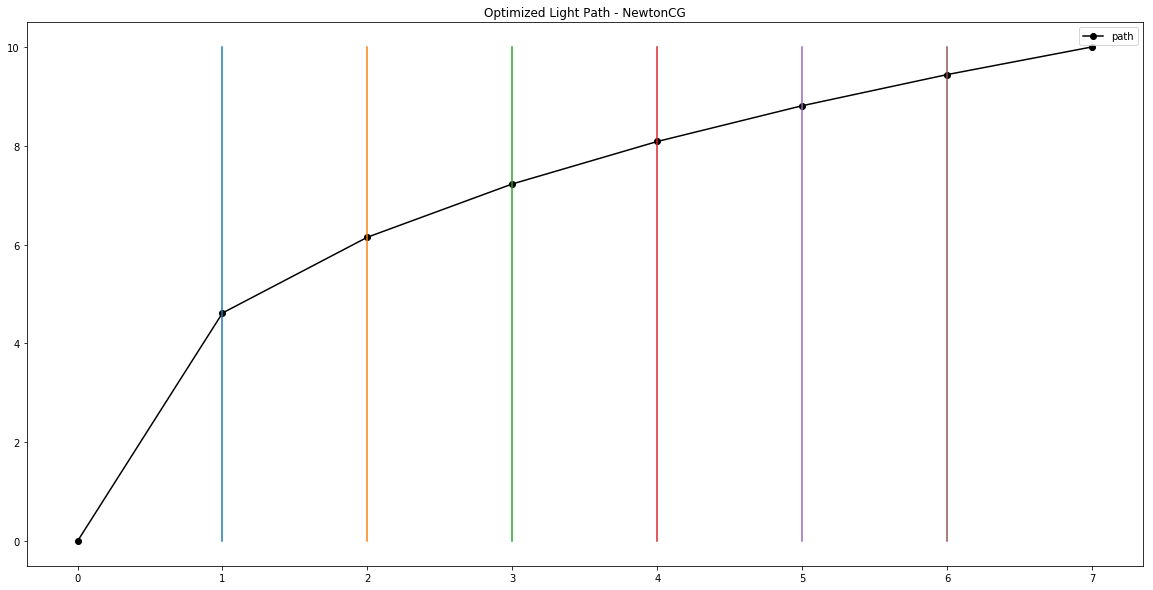

In [310]:
xres = gres.x
xres = np.append(np.append([x_0],xres),[x_np2])
xresi = np.append([x_0],xres)
xresip1 = np.append(xres,[x_np2])
print('result\n',xres)
print('refractive indexes\n',n0)
plt.figure(figsize=(20,10))
# plt.plot(xres,y[::-1],'ko-',label='path')
plt.plot(y0,xres,'ko-',label='path')
draw(x_0,x_np2,y0)
plt.legend()
plt.title("Optimized Light Path - NewtonCG")
plt.savefig("NewtonCG_%d"%num)
plt.show()

In [311]:
rates = getSinRatio(xres[:],np.array(y0))
print(rates)
nrates = n0[1:]/n0[:-1]
print(nrates)
err = np.abs(nrates-rates)
print(err/rates)

[1.16666667 1.14285714 1.125      1.11111111 1.1        1.09090909]
[1.16666667 1.14285714 1.125      1.11111111 1.1        1.09090909]
[2.30006871e-10 2.04701173e-10 1.19781715e-10 1.59064362e-10
 1.32701930e-12 6.13065154e-13]


# ====================================

In [312]:
hres = opt.minimize(T,xinit,method='BFGS',\
                    jac=grad,\
                    options={'gtol':1e-10,'disp':True})

         Current function value: 17.313123
         Iterations: 24
         Function evaluations: 29
         Gradient evaluations: 28


result
 [ 0.          4.61554906  6.14947333  7.22703162  8.0859095   8.80983104
  9.4399112  10.        ]
refractive indexes
 [1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.        ]


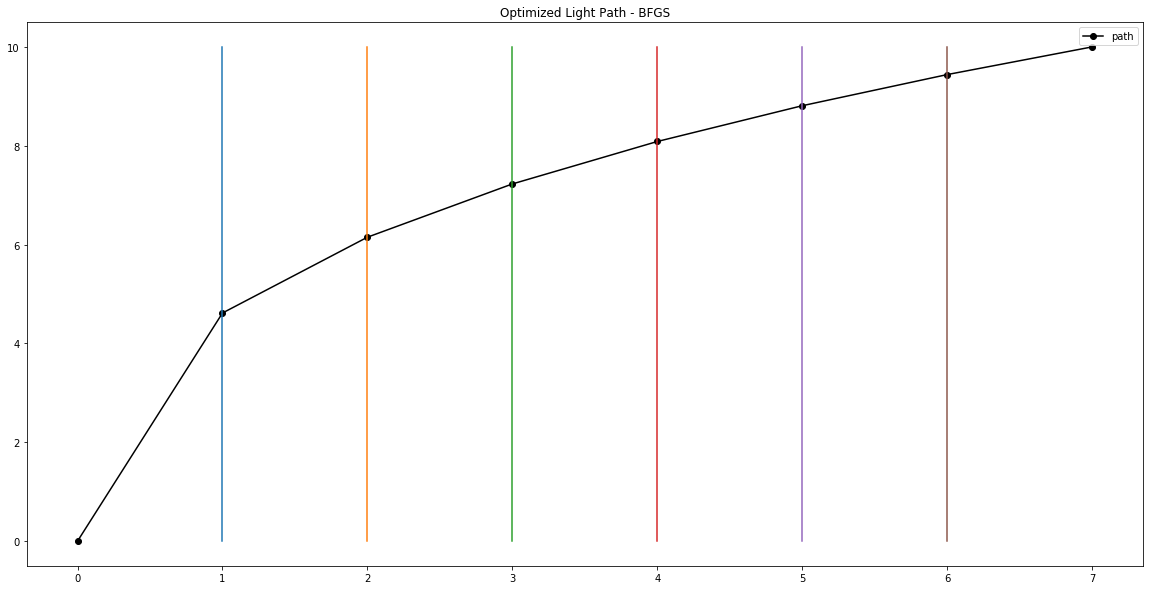

In [313]:
xres = hres.x
xres = np.append(np.append([x_0],xres),[x_np2])
xresi = np.append([x_0],xres)
xresip1 = np.append(xres,[x_np2])
print('result\n',xres)
print('refractive indexes\n',n0)
plt.figure(figsize=(20,10))
# plt.plot(xres,y[::-1],'ko-',label='path')
plt.plot(y0,xres,'ko-',label='path')
draw(x_0,x_np2,y0)
plt.legend()
plt.title("Optimized Light Path - BFGS")
plt.savefig("BFGS_%d"%num)
plt.show()

In [314]:
rates = getSinRatio(xres[:],np.array(y0))
print(rates)
nrates = n0[1:]/n0[:-1]
print(nrates)
err = np.abs(nrates-rates)
print(err/rates)

[1.16666667 1.14285714 1.125      1.11111111 1.1        1.09090909]
[1.16666667 1.14285714 1.125      1.11111111 1.1        1.09090909]
[5.15873059e-11 2.70982681e-11 1.23959904e-10 1.27922473e-10
 4.30221515e-11 7.84190120e-11]


# ====================================

In [315]:
res = opt.minimize(T,xinit,method='Nelder-Mead',options={'maxiter':1e8,'xtol':1e-6,'disp':True})

Optimization terminated successfully.
         Current function value: 17.313123
         Iterations: 785
         Function evaluations: 1234


result
 [ 0.          4.61554826  6.1494726   7.22703124  8.0859092   8.80983086
  9.43991129 10.        ]
refractive indexes
 [1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.        ]


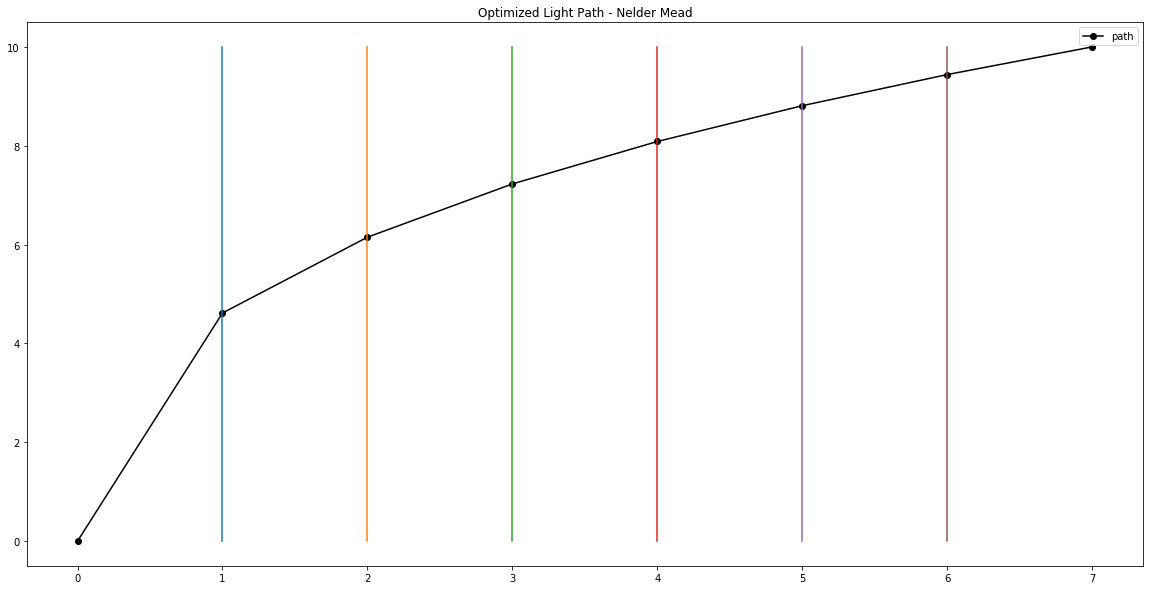

In [316]:
xres = res.x
xres = np.append(np.append([x_0],xres),[x_np2])
xresi = np.append([x_0],xres)
xresip1 = np.append(xres,[x_np2])
print('result\n',xres)
print('refractive indexes\n',n0)
plt.figure(figsize=(20,10))
# plt.plot(xres,y[::-1],'ko-',label='path')
plt.plot(y0,xres,'ko-',label='path')
draw(x_0,x_np2,y0)
plt.legend()
plt.title("Optimized Light Path - Nelder Mead")
plt.savefig("nelder_mead_%d"%num)
plt.show()

In [317]:
rates = getSinRatio(xres[:],np.array(y0))
print(rates)
nrates = n0[1:]/n0[:-1]
print(nrates)
err = np.abs(nrates-rates)
print(err/rates)

[1.16666664 1.14285699 1.12500011 1.11111105 1.09999976 1.09090959]
[1.16666667 1.14285714 1.125      1.11111111 1.1        1.09090909]
[2.10823839e-08 1.35374690e-07 9.79567462e-08 5.32394839e-08
 2.20736653e-07 4.58680578e-07]


# ====================================

In [318]:
res = opt.minimize(TC,xinit,method='Nelder-Mead',options={'maxiter':1e8,'xtol':1e-6,'disp':True})

Optimization terminated successfully.
         Current function value: -982.686877
         Iterations: 785
         Function evaluations: 1234


result
 [ 0.          4.61554806  6.14947249  7.22703119  8.08590914  8.80983087
  9.4399113  10.        ]
refractive indexes
 [1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.        ]


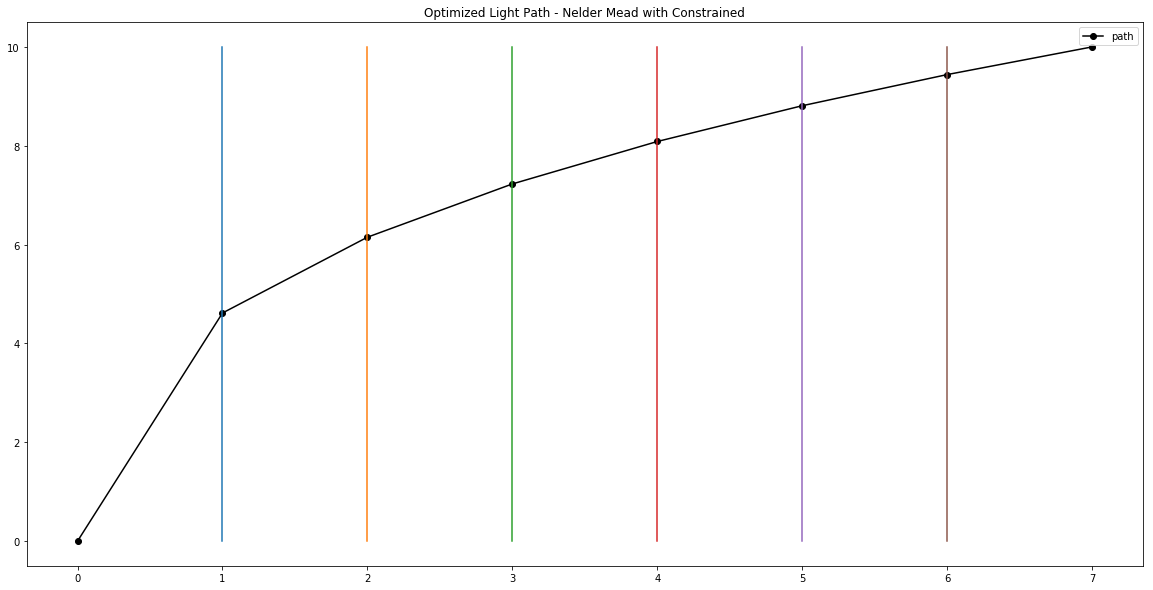

In [319]:
xres = res.x
xres = np.append(np.append([x_0],xres),[x_np2])
xresi = np.append([x_0],xres)
xresip1 = np.append(xres,[x_np2])
print('result\n',xres)
print('refractive indexes\n',n0)
plt.figure(figsize=(20,10))
# plt.plot(xres,y[::-1],'ko-',label='path')
plt.plot(y0,xres,'ko-',label='path')
draw(x_0,x_np2,y0)
plt.legend()
plt.title("Optimized Light Path - Nelder Mead with Constrained")
plt.savefig("nelder_mead_constrainted_%d"%num)
plt.show()

In [320]:
rates = getSinRatio(xres[:],np.array(y0))
print(rates)
nrates = n0[1:]/n0[:-1]
print(nrates)
err = np.abs(nrates-rates)
print(err/rates)

[1.16666662 1.14285698 1.12500014 1.11111098 1.09999983 1.0909096 ]
[1.16666667 1.14285714 1.125      1.11111111 1.1        1.09090909]
[4.01904998e-08 1.42897354e-07 1.24601987e-07 1.14108366e-07
 1.58310756e-07 4.63780328e-07]


# ====================================

In [321]:
res = opt.minimize(T,xinit,method='Powell',options={'maxiter':1e8,'xtol':1e-6,'disp':True})

Optimization terminated successfully.
         Current function value: 17.313308
         Iterations: 9
         Function evaluations: 686


result
 [ 0.          4.60850207  6.13592818  7.21082724  8.08955266  8.81609011
  9.44827668 10.        ]
refractive indexes
 [1.         1.16666667 1.33333333 1.5        1.66666667 1.83333333
 2.        ]


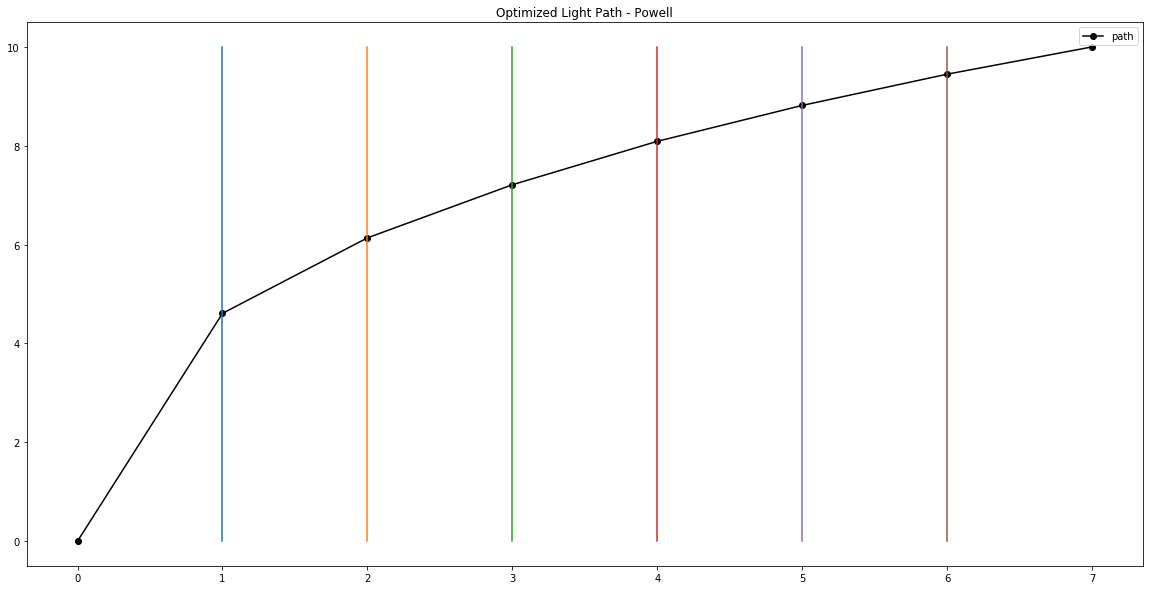

In [322]:
xres = res.x
xres = np.append(np.append([x_0],xres),[x_np2])
print('result\n',xres)
print('refractive indexes\n',n0)
plt.figure(figsize=(20,10))
# plt.plot(xres,y[::-1],'ko-',label='path')
plt.plot(y0,xres,'ko-',label='path')
draw(x_0,x_np2,y0)
plt.legend()
plt.title("Optimized Light Path - Powell")
plt.savefig("powell_%d"%num)
plt.show()

In [323]:
rates = getSinRatio(xres[:],np.array(y0))
print(rates)
nrates = n0[1:]/n0[:-1]
print(nrates)
err = np.abs(nrates-rates)
print(err/rates)

[1.16806904 1.14271421 1.1091774  1.12301415 1.09997468 1.1061597 ]
[1.16666667 1.14285714 1.125      1.11111111 1.1        1.09090909]
[1.20059311e-03 1.25082811e-04 1.42651693e-02 1.05991895e-02
 2.30159120e-05 1.37869848e-02]
